In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib
import scipy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from matplotlib.colors import LogNorm
plt.style.use('science')
matplotlib.rcParams.update({'font.size': 25})

Source 10 

In [2]:
results_10 = np.loadtxt('Constant_Sangria/Sobbh10/results_storage.txt')
final_upsilons_10 = results_10[:,-1]
parameter_locations_10 = results_10[:,:-1]

In [3]:
max_ungapped_10 = 498.19794029248925
max_gapped_10 = 419.8350650582691

Source 1

In [4]:
results_1 = np.loadtxt('Cyclostationary_estimated/Sobbh1/results_storage.txt')
final_upsilons_1 = results_1[:,-1]
parameter_locations_1 = results_1[:,:-1]

In [5]:
max_ungapped_1 = 144.7551504594605
max_gapped_1 = 120.0529172822047

In [6]:

def power_law(x,a,b):
    return(a*x**b)


In [9]:
len(final_upsilons_10)

743

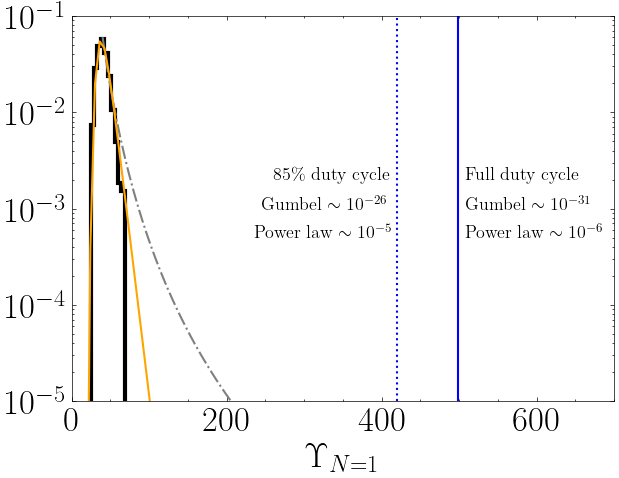

In [7]:
plt.figure(figsize=(7,5))
plt.hist(final_upsilons_10,histtype='step',bins=10,density=True,lw=3,color='k')


counts,bins = np.histogram(final_upsilons_10,density=True,bins=10)
bin_midpoints = (bins[1:]+bins[:-1])/2

# Only include the high tail power law bit 
bins_filter_mask = (bin_midpoints>40)

popt,pcov = scipy.optimize.curve_fit(power_law,bin_midpoints[bins_filter_mask],counts[bins_filter_mask])
bins_detailed = np.linspace(0,600,100)
bins_detailed_power_law = np.linspace(bin_midpoints[bins_filter_mask][0],600,100)

fit = power_law(bins_detailed_power_law,*popt)
plt.plot(bins_detailed_power_law,fit,lw=1.5,color='gray',ls='-.')

def gumbal_func(x,mu,sigma):
    G = (1/sigma)*np.exp(-((x-mu)/sigma)-np.exp(-(x-mu)/sigma))
    return(G)
def gumbal_func_CDF(x,mu,sigma):
    C = np.exp(-np.exp(-(x-mu)/sigma,dtype=np.float128),dtype=np.float128)
    return(C)
popt_gumbel,pcov = scipy.optimize.curve_fit(gumbal_func,bin_midpoints,counts)
plt.plot(bins_detailed,gumbal_func(bins_detailed,*popt_gumbel),color='orange',lw=1.5)

plt.axvline(max_ungapped_10,color='b',lw=1.5,label='Full duty cycle')
plt.axvline(max_gapped_10,color='b',ls=':',lw=1.5,label=r'85\% duty cycle')

# plt.text(max_ungapped-120,np.max(counts)*0.5,'Source 10',fontsize=15)
plt.text(max_ungapped_10+10,2.e-3,r'Full duty cycle',fontsize=13)
plt.text(max_ungapped_10+10,1.e-3,r'Gumbel $\sim 10^{-31}$',fontsize=13)
plt.text(max_ungapped_10+10,5.e-4,r'Power law $\sim 10^{-6}$',fontsize=13)

plt.text(max_gapped_10-160,2.e-3,r'85\% duty cycle',fontsize=13)
plt.text(max_gapped_10-175,1.e-3,r'Gumbel $\sim 10^{-26}$',fontsize=13)
plt.text(max_gapped_10-185,5.e-4,r'Power law $\sim 10^{-5}$',fontsize=13)

plt.semilogy()
plt.xlim(0,700)
plt.xlabel(r'$\Upsilon_{N=1}$')
plt.ylim(1.e-5,0.1)
plt.savefig('Sobbh10_false_alarm_probability.pdf')

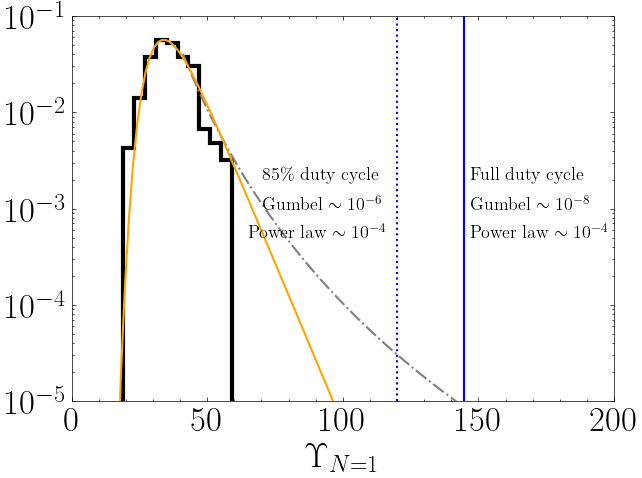

In [8]:
plt.figure(figsize=(7,5))
plt.hist(final_upsilons_1,histtype='step',bins=10,density=True,lw=3,color='k')


counts,bins = np.histogram(final_upsilons_1,density=True,bins=10)
bin_midpoints = (bins[1:]+bins[:-1])/2

# Only include the high tail power law bit 
bins_filter_mask = (bin_midpoints>40)

popt,pcov = scipy.optimize.curve_fit(power_law,bin_midpoints[bins_filter_mask],counts[bins_filter_mask])
bins_detailed = np.linspace(0,150,100)
bins_detailed_power_law = np.linspace(bin_midpoints[bins_filter_mask][0],150,100)

fit = power_law(bins_detailed_power_law,*popt)
plt.plot(bins_detailed_power_law,fit,lw=1.5,color='gray',ls='-.')

def gumbal_func(x,mu,sigma):
    G = (1/sigma)*np.exp(-((x-mu)/sigma)-np.exp(-(x-mu)/sigma))
    return(G)
def gumbal_func_CDF(x,mu,sigma):
    C = np.exp(-np.exp(-(x-mu)/sigma,dtype=np.float128),dtype=np.float128)
    return(C)
popt_gumbel,pcov = scipy.optimize.curve_fit(gumbal_func,bin_midpoints,counts)
plt.plot(bins_detailed,gumbal_func(bins_detailed,*popt_gumbel),color='orange',lw=1.5)


plt.axvline(max_ungapped_1,color='b',lw=1.5,label='Full duty cycle')
plt.axvline(max_gapped_1,color='b',ls=':',lw=1.5,label=r'85\% duty cycle')

plt.text(max_ungapped_1+2,2.e-3,r'Full duty cycle',fontsize=13)
plt.text(max_ungapped_1+2,1.e-3,r'Gumbel $\sim 10^{-8}$',fontsize=13)
plt.text(max_ungapped_1+2,5.e-4,r'Power law $\sim 10^{-4}$',fontsize=13)

plt.text(max_gapped_1-50,2.e-3,r'85\% duty cycle',fontsize=13)
plt.text(max_gapped_1-50,1.e-3,r'Gumbel $\sim 10^{-6}$',fontsize=13)
plt.text(max_gapped_1-55,5.e-4,r'Power law $\sim 10^{-4}$',fontsize=13)

plt.semilogy()
plt.xlim(0,200)
plt.xlabel(r'$\Upsilon_{N=1}$')
plt.ylim(1.e-5,0.1)
plt.savefig('Sobbh1_false_alarm_probability.pdf')

In [9]:
Tobs =63115195
dT = 6 * 3600 # length of each chunk in seconds
nT = int(Tobs/dT) # length of each time chunk 

dt = 5
fmax = 1 / dt / 2
dF = fmin = 1 / dT
nF = int((fmax - fmin) / dF) + 1  # bins per segment
f_seg = np.arange(1,nF+1) * dF  # segment frequencies
t_seg = np.arange(nT) * dT

nperseg = int(dT // dt)  # samples per segment

In [10]:
Tobs

63115195

In [11]:
nF

2160

In [12]:
TF_gapped = np.load('Whitened_gapped_tf.npy',allow_pickle=True)

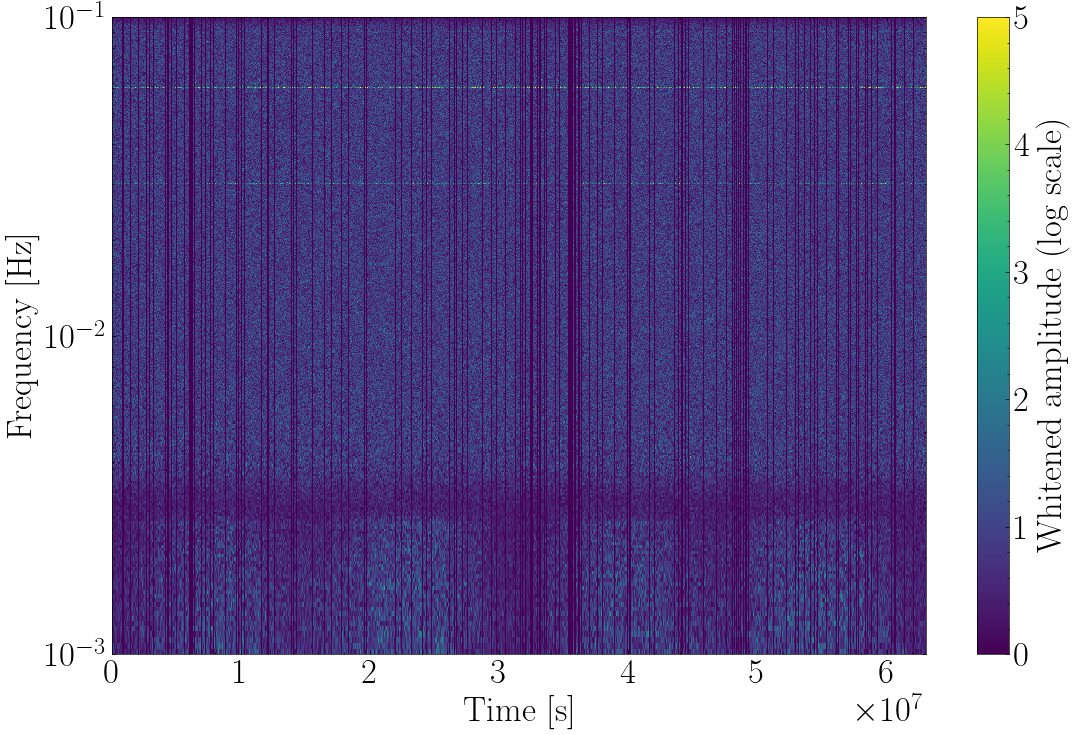

In [13]:
plt.figure(figsize=(12,8))
mesh = plt.pcolormesh(t_seg,f_seg,TF_gapped,shading='nearest',vmax=5)
plt.colorbar(mesh, label='Whitened amplitude (log scale)')
plt.ylim(1.e-3,)
plt.semilogy()
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.tight_layout()
plt.savefig('Yorsh_TF_gapped.png')
plt.show()


Big combined figure 

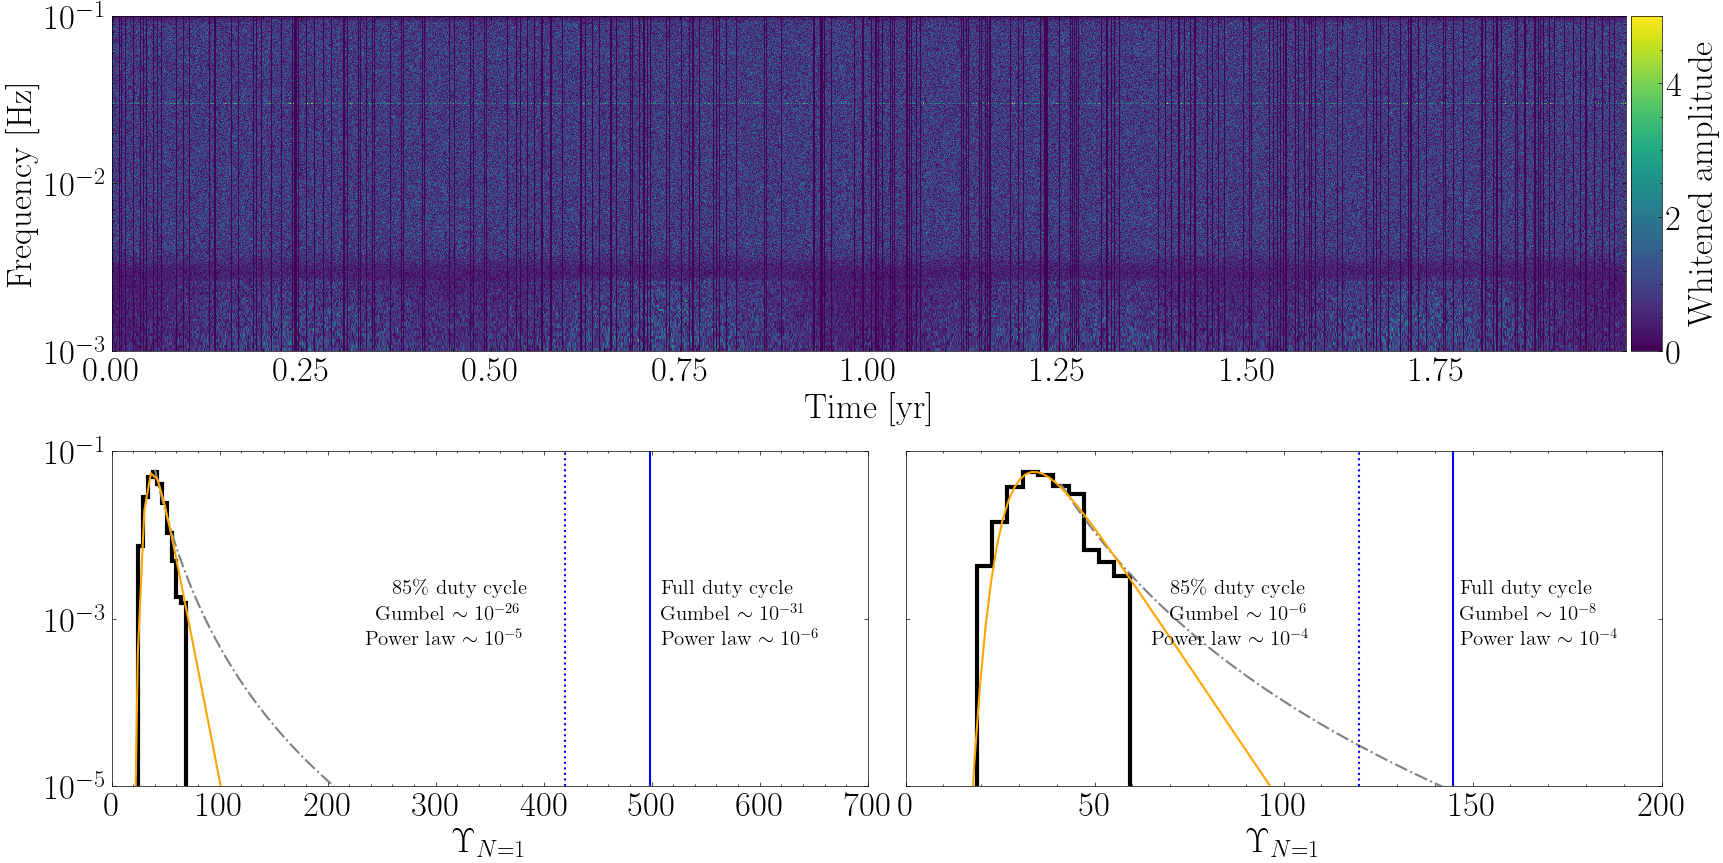

In [14]:
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, :],rasterized=True)

mesh = ax0.pcolormesh(t_seg/(365.25*24*60*60),f_seg,TF_gapped,shading='nearest',vmax=5)

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='2%', pad=0.05)
fig.colorbar(mesh, cax=cax, orientation='vertical',label='Whitened amplitude')

ax0.set_ylim(1.e-3,)
ax0.semilogy()
ax0.set_xlabel('Time [yr]')
ax0.set_ylabel('Frequency [Hz]')


ax1 = fig.add_subplot(gs[1, 0])

# SOURCE 10 
#####################################
ax1.hist(final_upsilons_10,histtype='step',bins=10,density=True,lw=3,color='k')


counts,bins = np.histogram(final_upsilons_10,density=True,bins=10)
bin_midpoints = (bins[1:]+bins[:-1])/2

# Only include the high tail power law bit 
bins_filter_mask = (bin_midpoints>40)

popt,pcov = scipy.optimize.curve_fit(power_law,bin_midpoints[bins_filter_mask],counts[bins_filter_mask])
bins_detailed = np.linspace(0,600,100)
bins_detailed_power_law = np.linspace(bin_midpoints[bins_filter_mask][0],600,100)

fit = power_law(bins_detailed_power_law,*popt)
ax1.plot(bins_detailed_power_law,fit,lw=1.5,color='gray',ls='-.')

def gumbal_func(x,mu,sigma):
    G = (1/sigma)*np.exp(-((x-mu)/sigma)-np.exp(-(x-mu)/sigma))
    return(G)
def gumbal_func_CDF(x,mu,sigma):
    C = np.exp(-np.exp(-(x-mu)/sigma,dtype=np.float128),dtype=np.float128)
    return(C)
popt_gumbel,pcov = scipy.optimize.curve_fit(gumbal_func,bin_midpoints,counts)
ax1.plot(bins_detailed,gumbal_func(bins_detailed,*popt_gumbel),color='orange',lw=1.5)

ax1.axvline(max_ungapped_10,color='b',lw=1.5,label='Full duty cycle')
ax1.axvline(max_gapped_10,color='b',ls=':',lw=1.5,label=r'85\% duty cycle')

# plt.text(max_ungapped-120,np.max(counts)*0.5,'Source 10',fontsize=15)
ax1.text(max_ungapped_10+10,2.e-3,r'Full duty cycle',fontsize=15)
ax1.text(max_ungapped_10+10,1.e-3,r'Gumbel $\sim 10^{-31}$',fontsize=15)
ax1.text(max_ungapped_10+10,5.e-4,r'Power law $\sim 10^{-6}$',fontsize=15)

ax1.text(max_gapped_10-160,2.e-3,r'85\% duty cycle',fontsize=15)
ax1.text(max_gapped_10-175,1.e-3,r'Gumbel $\sim 10^{-26}$',fontsize=15)
ax1.text(max_gapped_10-185,5.e-4,r'Power law $\sim 10^{-5}$',fontsize=15)

ax1.semilogy()
ax1.set_xlim(0,700)
ax1.set_xlabel(r'$\Upsilon_{N=1}$')
ax1.set_ylim(1.e-5,0.1)

###################################

ax2 = fig.add_subplot(gs[1, 1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
#         SOURCE 1 
##############################
ax2.hist(final_upsilons_1,histtype='step',bins=10,density=True,lw=3,color='k')


counts,bins = np.histogram(final_upsilons_1,density=True,bins=10)
bin_midpoints = (bins[1:]+bins[:-1])/2

# Only include the high tail power law bit 
bins_filter_mask = (bin_midpoints>40)

popt,pcov = scipy.optimize.curve_fit(power_law,bin_midpoints[bins_filter_mask],counts[bins_filter_mask])
bins_detailed = np.linspace(0,150,100)
bins_detailed_power_law = np.linspace(bin_midpoints[bins_filter_mask][0],150,100)

fit = power_law(bins_detailed_power_law,*popt)
ax2.plot(bins_detailed_power_law,fit,lw=1.5,color='gray',ls='-.')

def gumbal_func(x,mu,sigma):
    G = (1/sigma)*np.exp(-((x-mu)/sigma)-np.exp(-(x-mu)/sigma))
    return(G)
def gumbal_func_CDF(x,mu,sigma):
    C = np.exp(-np.exp(-(x-mu)/sigma,dtype=np.float128),dtype=np.float128)
    return(C)
popt_gumbel,pcov = scipy.optimize.curve_fit(gumbal_func,bin_midpoints,counts)
ax2.plot(bins_detailed,gumbal_func(bins_detailed,*popt_gumbel),color='orange',lw=1.5)


ax2.axvline(max_ungapped_1,color='b',lw=1.5,label='Full duty cycle')
ax2.axvline(max_gapped_1,color='b',ls=':',lw=1.5,label=r'85\% duty cycle')

ax2.text(max_ungapped_1+2,2.e-3,r'Full duty cycle',fontsize=15)
ax2.text(max_ungapped_1+2,1.e-3,r'Gumbel $\sim 10^{-8}$',fontsize=15)
ax2.text(max_ungapped_1+2,5.e-4,r'Power law $\sim 10^{-4}$',fontsize=15)

ax2.text(max_gapped_1-50,2.e-3,r'85\% duty cycle',fontsize=15)
ax2.text(max_gapped_1-50,1.e-3,r'Gumbel $\sim 10^{-6}$',fontsize=15)
ax2.text(max_gapped_1-55,5.e-4,r'Power law $\sim 10^{-4}$',fontsize=15)

ax2.semilogy()
ax2.set_xlim(0,200)
ax2.set_xlabel(r'$\Upsilon_{N=1}$')
ax2.set_ylim(1.e-5,0.1)

##################################

# Clear up space a bit 
plt.subplots_adjust(hspace=0.3)

# Squish two plots together
plt.subplots_adjust(wspace=0.05)

plt.savefig('Gaps+False_alarm.pdf')
plt.show()